In [1]:
import pandas as pd 
df_sales = pd.read_csv('florist-order-record.csv')
df_sales.head()

,Order,ProductID,Date,Products,Number,Price,UserID,City
0,536374,21258,6/1/2020 9:09,Five Colorful Roses,32,10.95,15100,Beijing
1,536376,22114,6/1/2020 9:32,25 White Jasmine,48,3.45,15291,Shanghai
2,536376,21733,6/1/2020 9:32,3 Sunflowers 5 Eucalyptus,64,2.55,15291,Shanghai
3,536378,22386,6/1/2020 9:37,Lily Pink,10,1.95,14688,Beijing
4,536378,85099C,6/1/2020 9:37,Champagne Carnation,10,1.95,14688,Beijing


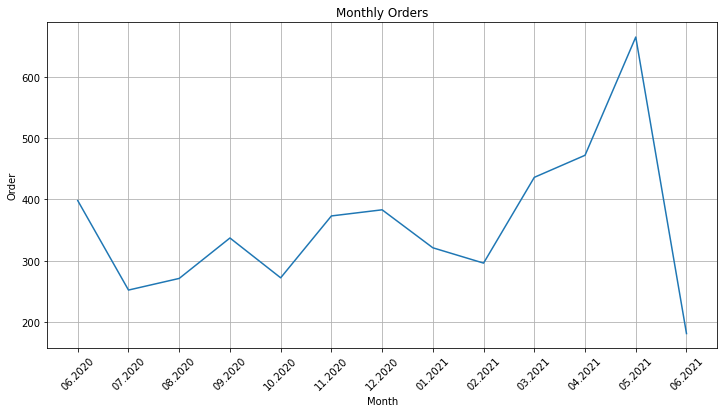

In [2]:
import matplotlib.pyplot as plt
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_orders_monthly = df_sales.set_index('Date')['Order'].resample('M').nunique()
ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True,figsize=(12,6),legend=False)
ax.set_xlabel('Month')
ax.set_ylabel('Order')
ax.set_title('Monthly Orders')
plt.xticks(
    range(len(df_orders_monthly.index)), 
    [x.strftime('%m.%Y') for x in df_orders_monthly.index], 
    rotation=45)
plt.show()

In [3]:
df_sales = df_sales.drop_duplicates()

In [4]:
df_sales.isna().sum()

Order        0
ProductID    0
Date         0
Products     0
Number       0
Price        0
UserID       0
City         0
dtype: int64

In [5]:
df_sales.describe()

,Number,Price,UserID
count,85920.000000,85920.000000,85920.000000
mean,10.115747,3.599711,15338.080389
std,49.114285,134.410498,391.309086
min,-9360.000000,0.000000,14681.000000
25%,2.000000,1.250000,15022.000000
50%,4.000000,1.950000,15334.000000
75%,12.000000,3.750000,15673.000000
max,3114.000000,38970.000000,16019.000000


In [6]:
df_sales = df_sales.loc[df_sales['Number'] > 0]

In [7]:
df_sales.describe()

,Number,Price,UserID
count,84112.000000,84112.000000,84112.000000
mean,10.760236,3.005032,15337.732963
std,34.018906,15.365085,392.074855
min,1.000000,0.000000,14681.000000
25%,2.000000,1.250000,15021.000000
50%,5.000000,1.950000,15333.000000
75%,12.000000,3.750000,15674.000000
max,3114.000000,3155.950000,16019.000000


In [8]:
df_sales['TotalPrice'] = df_sales['Number'] * df_sales['Price']
df_sales.head()

,Order,ProductID,Date,Products,Number,Price,UserID,City,TotalPrice
0,536374,21258,2020-06-01 09:09:00,Five Colorful Roses,32,10.95,15100,Beijing,350.4
1,536376,22114,2020-06-01 09:32:00,25 White Jasmine,48,3.45,15291,Shanghai,165.6
2,536376,21733,2020-06-01 09:32:00,3 Sunflowers 5 Eucalyptus,64,2.55,15291,Shanghai,163.2
3,536378,22386,2020-06-01 09:37:00,Lily Pink,10,1.95,14688,Beijing,19.5
4,536378,85099C,2020-06-01 09:37:00,Champagne Carnation,10,1.95,14688,Beijing,19.5


In [9]:
df_user = pd.DataFrame(df_sales['UserID'].unique())
df_user.columns = ['UserID']
df_user = df_user.sort_values(by='UserID',ascending=True).reset_index(drop=True)
df_user

,UserID
0,14681
1,14682
2,14684
3,14687
4,14688
...,...
975,16015
976,16016
977,16017
978,16018


In [10]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_recent_buy = df_sales.groupby('UserID').Date.max().reset_index()
df_recent_buy.columns = ['UserID','LastDate']
df_recent_buy['Recency'] = (df_recent_buy['LastDate'].max() - df_recent_buy['LastDate']).dt.days
df_user = pd.merge(df_user, df_recent_buy[['UserID','Recency']], on='UserID')
df_user.head()

,UserID,Recency
0,14681,70
1,14682,187
2,14684,25
3,14687,106
4,14688,7


In [11]:
df_frequency = df_sales.groupby('UserID').Date.count().reset_index()
df_frequency.columns = ['UserID','Frequency']
df_user = pd.merge(df_user, df_frequency, on='UserID')
df_user.head()

,UserID,Recency,Frequency
0,14681,70,7
1,14682,187,2
2,14684,25,390
3,14687,106,15
4,14688,7,324


In [ ]:
df_revenue = df_sales.groupby('UserID').TotalPrice.sum().reset_index()
df_revenue.columns = ['UserID','Monetary']
df_user = pd.merge(df_user, df_revenue, on='UserID')
df_user.head()